

<hr style="margin-bottom: 40px;">

# Principal - MPF Portfolio Optimization Model

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (A) Understanding the data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.read_excel("Principal.xlsx", parse_dates=True, index_col="date")


In [3]:
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df

,PRIAGSD HK Equity,PRSSCOA HK Equity,PRIGLGC HK Equity,PRIHDSC HK Equity,PRILTAC HK Equity,PRILTGC HK Equity,PRICAPC HK Equity,PRASBON HK Equity,PRISTYC HK Equity
date,,,,,,,,,
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-07-27,22.73,12.1732,25.45,11.3009,20.8468,13.7362,11.5151,10.9005,19.4411
2020-07-28,22.80,12.1550,25.52,11.3029,20.8949,13.7438,11.5152,10.9209,19.4732
2020-07-29,22.89,12.2115,25.62,11.3045,20.9627,13.7720,11.5152,10.9261,19.5245


In [4]:
df.shape

(5053, 9)

In [5]:
df.info()
#6 - AMINAGP HK Equity and  8 - AMINCAA HK Equity have only 684 non-null. 5 - AMRSGRF HK Equity has only 189 non-null.
#Others are similar - about 2600 entries.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRIAGSD HK Equity  1563 non-null   float64
 1   PRSSCOA HK Equity  820 non-null    float64
 2   PRIGLGC HK Equity  4801 non-null   float64
 3   PRIHDSC HK Equity  4763 non-null   float64
 4   PRILTAC HK Equity  4766 non-null   float64
 5   PRILTGC HK Equity  4766 non-null   float64
 6   PRICAPC HK Equity  4767 non-null   float64
 7   PRASBON HK Equity  1798 non-null   float64
 8   PRISTYC HK Equity  4766 non-null   float64
dtypes: float64(9)
memory usage: 394.8 KB


In [6]:
df.values

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [22.89  , 12.2115, 25.62  , ..., 11.5152, 10.9261, 19.5245],
       [22.77  , 12.1747, 25.52  , ..., 11.5152, 10.9499, 19.5053],
       [22.72  , 12.1655, 25.5   , ..., 11.5152, 10.9521, 19.5264]])

In [7]:
describe = df.describe()
describe

,PRIAGSD HK Equity,PRSSCOA HK Equity,PRIGLGC HK Equity,PRIHDSC HK Equity,PRILTAC HK Equity,PRILTGC HK Equity,PRICAPC HK Equity,PRASBON HK Equity,PRISTYC HK Equity
count,1563.000000,820.000000,4801.000000,4763.000000,4766.000000,4766.000000,4767.000000,1798.000000,4766.000000
mean,20.006846,10.997487,16.644212,10.756074,14.554230,11.467751,10.959695,9.981389,14.457342
std,2.112108,0.525962,5.180473,0.300939,3.491566,1.366887,0.402181,0.312778,2.802819
min,15.610000,9.559700,7.440000,10.039000,8.322800,8.135500,10.098000,9.465900,9.426700
25%,18.160000,10.608125,11.740000,10.383300,11.042025,10.296325,10.450350,9.756450,11.751625
50%,19.810000,10.999800,17.180000,10.890800,14.892550,11.812950,11.199400,9.905050,14.972500
75%,21.940000,11.294025,20.650000,10.937000,17.333125,12.709800,11.229500,10.125125,16.683100
max,24.750000,12.227100,26.550000,11.305600,20.962700,13.785000,11.516000,10.952100,19.526400


In [8]:
df.head

<bound method NDFrame.head of             PRIAGSD HK Equity  PRSSCOA HK Equity  PRIGLGC HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27              22.73            12.1732              25.45   
2020-07-28              22.80            12.1550              25.52   
2020-07-29              22.89            12.2115              25.62   
2020-07-30              22.77            12.1747              25.52   
2020-07-31              22.72            12.1655              25.50   

            PRIHDSC HK Equity  PRILTAC HK Equi

In [9]:
df.tail

<bound method NDFrame.tail of             PRIAGSD HK Equity  PRSSCOA HK Equity  PRIGLGC HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27              22.73            12.1732              25.45   
2020-07-28              22.80            12.1550              25.52   
2020-07-29              22.89            12.2115              25.62   
2020-07-30              22.77            12.1747              25.52   
2020-07-31              22.72            12.1655              25.50   

            PRIHDSC HK Equity  PRILTAC HK Equi

In [10]:
df.dtypes

PRIAGSD HK Equity    float64
PRSSCOA HK Equity    float64
PRIGLGC HK Equity    float64
PRIHDSC HK Equity    float64
PRILTAC HK Equity    float64
PRILTGC HK Equity    float64
PRICAPC HK Equity    float64
PRASBON HK Equity    float64
PRISTYC HK Equity    float64
dtype: object

In [11]:
df.dropna(axis="index",how="all")

,PRIAGSD HK Equity,PRSSCOA HK Equity,PRIGLGC HK Equity,PRIHDSC HK Equity,PRILTAC HK Equity,PRILTGC HK Equity,PRICAPC HK Equity,PRASBON HK Equity,PRISTYC HK Equity
date,,,,,,,,,
2001-11-20,NaN,NaN,10.06,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-21,NaN,NaN,10.10,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-22,NaN,NaN,10.25,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-23,NaN,NaN,10.27,NaN,NaN,NaN,NaN,NaN,NaN
2001-11-26,NaN,NaN,10.24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-07-27,22.73,12.1732,25.45,11.3009,20.8468,13.7362,11.5151,10.9005,19.4411
2020-07-28,22.80,12.1550,25.52,11.3029,20.8949,13.7438,11.5152,10.9209,19.4732
2020-07-29,22.89,12.2115,25.62,11.3045,20.9627,13.7720,11.5152,10.9261,19.5245


Text(0.5, 1.0, 'Performance of Funds')

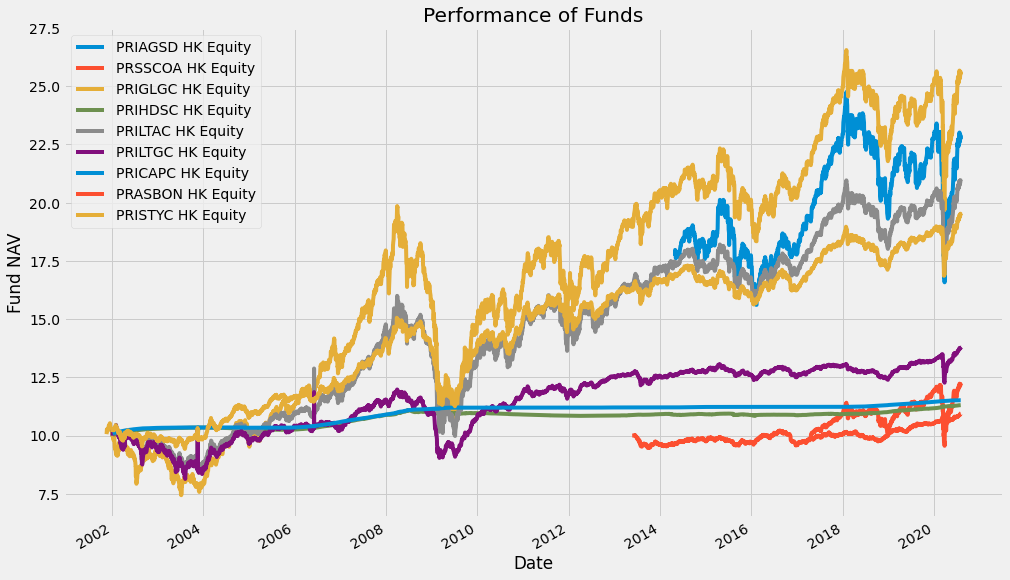

In [12]:
df.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Fund NAV')
plt.title("Performance of Funds")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (B) - Data Modelling

In [14]:
from sklearn.model_selection import train_test_split

X = np.array(df["PRIAGSD HK Equity"])

y = np.array(df["PRIAGSD HK Equity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#!pip install PyPortfolioOpt

In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [17]:
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(df).ledoit_wolf()
S

,PRIAGSD HK Equity,PRSSCOA HK Equity,PRIGLGC HK Equity,PRIHDSC HK Equity,PRILTAC HK Equity,PRILTGC HK Equity,PRICAPC HK Equity,PRASBON HK Equity,PRISTYC HK Equity
PRIAGSD HK Equity,0.004995,1.840985e-03,0.003628,0.000012,0.002594,0.000675,-1.213680e-06,1.680245e-04,3.813145e-04
PRSSCOA HK Equity,0.001841,1.864390e-03,0.001423,0.000002,0.001011,0.000388,-6.612932e-07,1.222094e-04,2.403562e-04
PRIGLGC HK Equity,0.003628,1.422994e-03,0.013192,0.000008,0.008002,0.002614,1.283569e-06,1.708659e-04,9.452471e-04
PRIHDSC HK Equity,0.000012,1.857033e-06,0.000008,0.000389,0.000021,0.000014,1.143969e-06,5.536045e-06,-2.719246e-06
PRILTAC HK Equity,0.002594,1.011489e-03,0.008002,0.000021,0.013143,0.008753,-2.106070e-05,1.585417e-04,2.808369e-04
PRILTGC HK Equity,0.000675,3.882314e-04,0.002614,0.000014,0.008753,0.008517,-1.942234e-05,1.022002e-04,-2.290349e-05
PRICAPC HK Equity,-0.000001,-6.612932e-07,0.000001,0.000001,-0.000021,-0.000019,3.115886e-04,1.701344e-07,-5.496619e-07
PRASBON HK Equity,0.000168,1.222094e-04,0.000171,0.000006,0.000159,0.000102,1.701344e-07,6.488391e-04,1.667424e-04
PRISTYC HK Equity,0.000381,2.403562e-04,0.000945,-0.000003,0.000281,-0.000023,-5.496619e-07,1.667424e-04,3.708007e-03


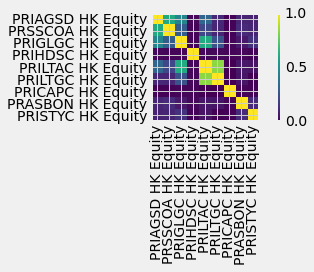

In [18]:
plotting.plot_covariance(S, plot_correlation=True,);

In [19]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

from pypfopt.expected_returns import mean_historical_return
mu = mean_historical_return(df)
mu

PRIAGSD HK Equity    0.040064
PRSSCOA HK Equity    0.062170
PRIGLGC HK Equity    0.050043
PRIHDSC HK Equity    0.006308
PRILTAC HK Equity    0.039926
PRILTGC HK Equity    0.017121
PRICAPC HK Equity    0.006968
PRASBON HK Equity    0.012828
PRISTYC HK Equity    0.035227
dtype: float64

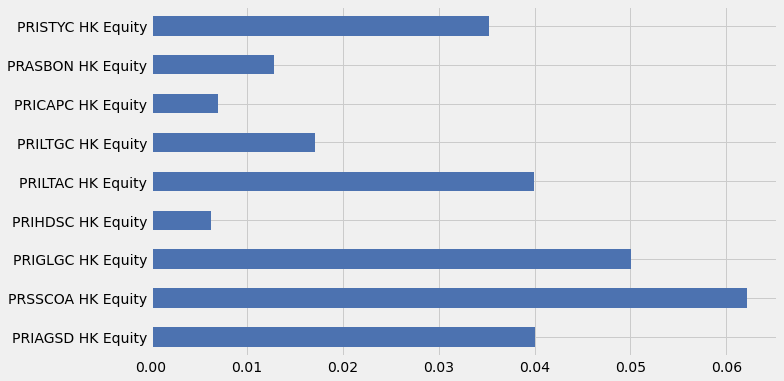

In [20]:
mu.plot.barh(figsize=(10,6))


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1a - Portfolio Optimization for maximal Sharpe ratio

### i.e. What combo of funds to choose within a scheme to earn the most and risk the least? 

In [21]:
#Optimize for maximal Sharpe ratio.
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close


OrderedDict([('PRIAGSD HK Equity', 0.0), ('PRSSCOA HK Equity', 0.89323), ('PRIGLGC HK Equity', 0.0), ('PRIHDSC HK Equity', 0.0), ('PRILTAC HK Equity', 0.0), ('PRILTGC HK Equity', 0.0), ('PRICAPC HK Equity', 0.0), ('PRASBON HK Equity', 0.0), ('PRISTYC HK Equity', 0.10677)])


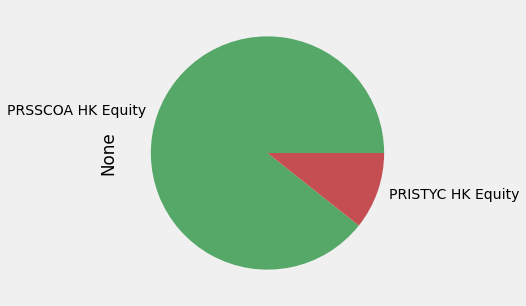

In [22]:
pd.Series(weights).plot.pie(figsize=(5,5))

In [23]:
performance = ef.portfolio_performance(verbose=True)

Expected annual return: 5.9%
Annual volatility: 4.0%
Sharpe Ratio: 0.99


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1b - Discrete Allocation of each fund

### i.e. How many shares for each fund should I buy?

In [24]:
#!pip install pulp

In [25]:
#Input amount of your portfolio
#tpv = float(input("Amount of your portfolio:"))     #Interactive element hidden for now.

In [26]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
print("Latest Price of all funds")
latest_prices

Latest Price of all funds


PRIAGSD HK Equity    22.7200
PRSSCOA HK Equity    12.1655
PRIGLGC HK Equity    25.5000
PRIHDSC HK Equity    11.3056
PRILTAC HK Equity    20.9168
PRILTGC HK Equity    13.7850
PRICAPC HK Equity    11.5152
PRASBON HK Equity    10.9521
PRISTYC HK Equity    19.5264
Name: 2020-07-31 00:00:00, dtype: float64

In [27]:
cleaned_weights = ef.clean_weights()
weights = cleaned_weights 
#da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=tpv)     #Interactive element hidden for now.
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)     #Hide this if using input() function.
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'PRSSCOA HK Equity': 1101, 'PRISTYC HK Equity': 82}
Funds remaining: $4.62


Text(0.5, 1.0, 'Performance of Funds')

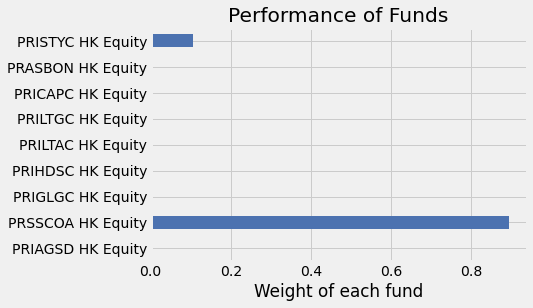

In [28]:
pd.Series(weights).plot.barh()
plt.xlabel('Weight of each fund')
plt.title("Performance of Funds")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 2a - Portfolio Optimization with given Risk Tolerance

### i.e. If your risk tolerance is higher, tell us what you expect and earn more return!

In [29]:
#Input your risk tolerance.
#rt = float(input("Your Risk tolerance in decimals:"))     #Interactive element hidden for now.

In [30]:
ef = EfficientFrontier(mu, S)

#ef.efficient_risk(target_volatility=rt)           #Interactive element hidden for now.
ef.efficient_risk(target_volatility=0.1)           #Hide this when using input() function
weights = ef.clean_weights()
weights

OrderedDict([('PRIAGSD HK Equity', 0.0),
             ('PRSSCOA HK Equity', 1.0),
             ('PRIGLGC HK Equity', 0.0),
             ('PRIHDSC HK Equity', 0.0),
             ('PRILTAC HK Equity', 0.0),
             ('PRILTGC HK Equity', 0.0),
             ('PRICAPC HK Equity', 0.0),
             ('PRASBON HK Equity', 0.0),
             ('PRISTYC HK Equity', 0.0)])

Text(0.5, 1.0, 'Fund Portfolio')

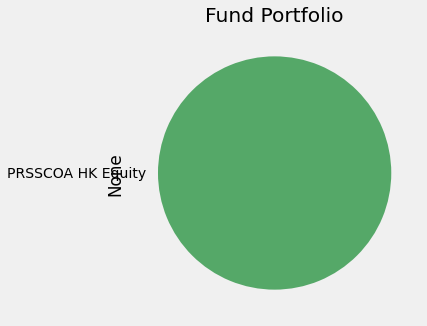

In [31]:
pd.Series(weights).plot.pie(figsize=(5,5))
plt.title("Fund Portfolio")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 3 - Minimise risk for a given return

In [32]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.efficient_return(target_return=0.05, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('PRIAGSD HK Equity', -0.23129),
             ('PRSSCOA HK Equity', 0.93931),
             ('PRIGLGC HK Equity', -0.01986),
             ('PRIHDSC HK Equity', -0.35108),
             ('PRILTAC HK Equity', 0.13473),
             ('PRILTGC HK Equity', -0.13688),
             ('PRICAPC HK Equity', -0.38181),
             ('PRASBON HK Equity', -0.09158),
             ('PRISTYC HK Equity', 0.13848)])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting Efficient Frontier

In [33]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 2.9%
Annual volatility: 1.8%
Sharpe Ratio: 0.52


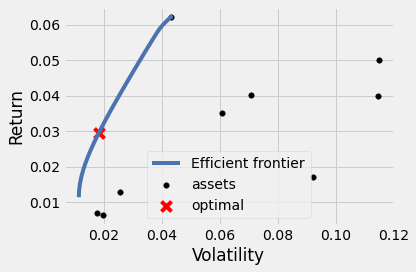

In [34]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# This scheme in a nutshell:

##         Any portfolio with volatility higher than 4.3% is bad because you earn the same afterwards. The highest return you can get is 6.2%.

In [38]:
risktolerance, annualreturn = [], []
for rt2 in np.arange(0.02, 1, 0.001):
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(target_volatility=rt2)
    weights = ef.clean_weights()
    ret, volatility, Sharpe = ef.portfolio_performance(verbose=True)
    annualreturn.append(ret)
    risktolerance.append(rt2)


Expected annual return: 3.2%
Annual volatility: 2.0%
Sharpe Ratio: 0.62
Expected annual return: 3.4%
Annual volatility: 2.1%
Sharpe Ratio: 0.66
Expected annual return: 3.5%
Annual volatility: 2.2%
Sharpe Ratio: 0.70
Expected annual return: 3.7%
Annual volatility: 2.3%
Sharpe Ratio: 0.73
Expected annual return: 3.8%
Annual volatility: 2.4%
Sharpe Ratio: 0.76
Expected annual return: 4.0%
Annual volatility: 2.5%
Sharpe Ratio: 0.79
Expected annual return: 4.1%
Annual volatility: 2.6%
Sharpe Ratio: 0.81
Expected annual return: 4.2%
Annual volatility: 2.7%
Sharpe Ratio: 0.83
Expected annual return: 4.4%
Annual volatility: 2.8%
Sharpe Ratio: 0.85
Expected annual return: 4.5%
Annual volatility: 2.9%
Sharpe Ratio: 0.87
Expected annual return: 4.7%
Annual volatility: 3.0%
Sharpe Ratio: 0.89
Expected annual return: 4.8%
Annual volatility: 3.1%
Sharpe Ratio: 0.90
Expected annual return: 4.9%
Annual volatility: 3.2%
Sharpe Ratio: 0.92
Expected annual return: 5.1%
Annual volatility: 3.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Ratio: 0.98
Expected annual return: 6.2%
Annual volatility: 4.3%
Sharpe Rati

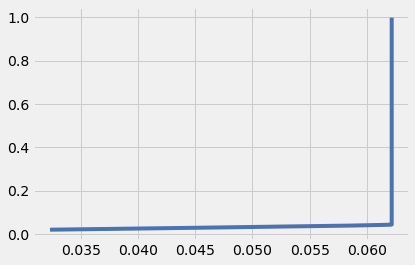

In [39]:
plt.plot(annualreturn, risktolerance)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [36]:
#anomaly detection - benchmark abnormal situations, find 